In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_full_combi = pd.read_csv('./full_combinatorial_testing/data/full_combinatorial_testing_evaluation.csv')
df_t_way = pd.read_csv('./t_way_testing/data/t_way_testing_evaluation.csv')
df_var = pd.read_csv('./variance_bounded_testing_method/data/variance_bounded_testing_method_evaluation.csv')

# Add a new column to identify the source DataFrame
df_full_combi['source'] = 'Full_Combinatorial_Testing'
df_t_way['source'] = 'T_Way_Testing'
df_var['source'] = 'Variance_Bounded_Testing'

df_full_combi = df_full_combi.sort_values(by='number_of_test_cases')
df_t_way = df_t_way.sort_values(by='number_of_test_cases')
df_var = df_var.sort_values(by='number_of_test_cases')

# Concatenate the DataFrames
combined_df = pd.concat([df_full_combi, df_t_way, df_var], ignore_index=True)

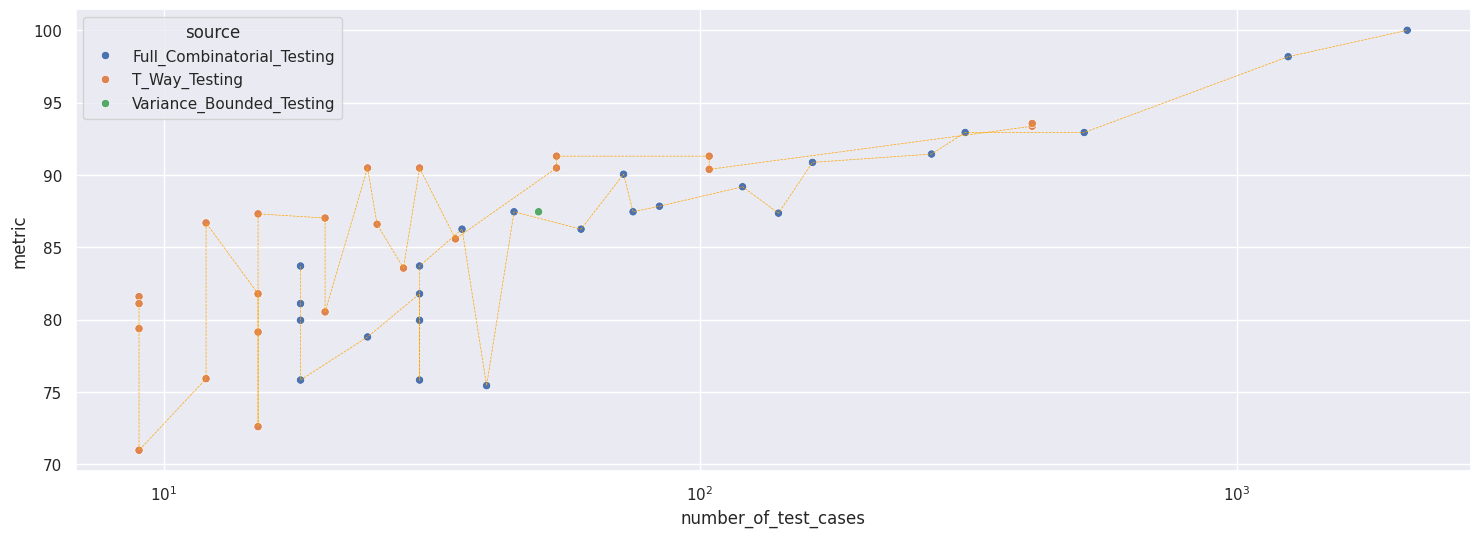

In [9]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 6))
# Plot the responses for different events and regions
sns.scatterplot(x="number_of_test_cases", y="metric",
             hue="source",
             data=combined_df)
plt.plot(df_full_combi['number_of_test_cases'], df_full_combi['metric'], color='orange', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_t_way['number_of_test_cases'], df_t_way['metric'], color='orange', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_var['number_of_test_cases'], df_var['metric'], color='green', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.xscale('log')

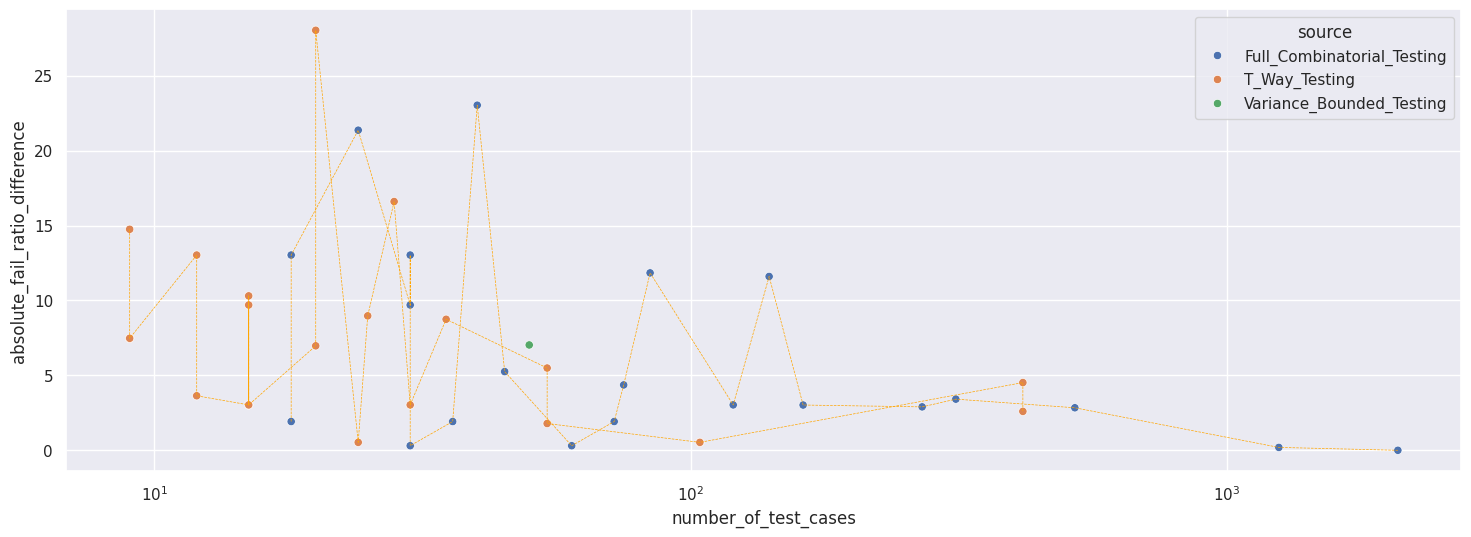

In [7]:
# Plot the responses for different events and regions
plt.figure(figsize=(18, 6))
sns.scatterplot(x="number_of_test_cases", y="absolute_fail_ratio_difference",
             hue="source",
             data=combined_df)
plt.plot(df_full_combi['number_of_test_cases'], df_full_combi['absolute_fail_ratio_difference'], color='orange', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_t_way['number_of_test_cases'], df_t_way['absolute_fail_ratio_difference'], color='orange', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_var['number_of_test_cases'], df_var['absolute_fail_ratio_difference'], color='green', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.xscale('log')

# Find rows with the same amount of test cases and chose the better one